c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


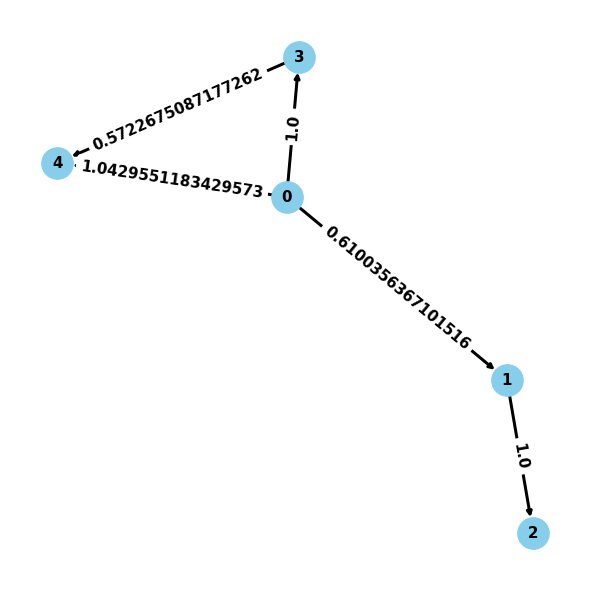

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product
from pyvis.network import Network

from DAG import DAG

dag = DAG(n = 5, roots = 1, strength=2, precalculate_paths = True)
dag.plot()

In [12]:
# dag.precalculate_paths = False
from time import time
t = time()
sim = dag.get_simulated_var(100000)
print("time:", time() - t)
t = time()
ana = dag.get_analytical_var()
print("time:", time() - t)

for i in range(dag.size):
    print("simulated", i, ":",round(sim[i]), "| analytical", ":", round(ana[i]))

print("")
varsort = dag.get_varsortability(analytical = True, simulated = True, N = 100000)
print("varsortability:", varsort)

time: 0.12483930587768555
time: 17.275866746902466
simulated 0 : 1 | analytical : 1
simulated 1 : 2 | analytical : 2
simulated 2 : 5 | analytical : 5
simulated 3 : 42 | analytical : 42
simulated 4 : 232 | analytical : 230
simulated 5 : 6 | analytical : 6
simulated 6 : 930 | analytical : 921
simulated 7 : 2480 | analytical : 2455
simulated 8 : 9059 | analytical : 8968
simulated 9 : 115241 | analytical : 114089
simulated 10 : 28948 | analytical : 28660
simulated 11 : 1038738 | analytical : 1028378
simulated 12 : 966751 | analytical : 957098
simulated 13 : 12955572 | analytical : 12826260
simulated 14 : 45700085 | analytical : 45243778

varsortability: {'analytical': 1.0, 'simulated': 1.0}


$V_a = \sum^{nodes}_i\sum_{j,k}\prod^{path_{j}}_j\prod^{path_{ia}}_k W_j W_kV_i + V_a$

In [32]:
# genetic algorithm

start_adj = np.array([[0,1,0,1,1,1],[0,0,1,1,1,1],[0,0,0,1,1,1],[0,0,0,0,1,1],[0,0,0,0,0,1],[0,0,0,0,0,0]]).astype(float)

population = 100

# start_dags = [DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj) for _ in range(population)]


# thomas siger lav grupper 
true = True

N = 300
for i in range(N):
    print("")
    print("generation", i)
    start_dags = sorted(start_dags, key = lambda x: x.get_continous_varsortability(analytical = True, simulated = False, N = 100000)["analytical"], reverse = False)
    start_dags = start_dags[:(population // 2)]

    for j in range(population // 2):
        start_dags.append(start_dags[j].mutate(1 - i/N))

    if i < N//2:
        new = DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj)
        start_dags.append(new.mutate())

    for j in range(1):
        print("varsortability:", start_dags[j].get_varsortability(analytical = True, simulated = True, N = 100000))
        print("continous_varsortability:", start_dags[j].get_continous_varsortability(analytical = True, simulated = False, N = 100000))


generation 0
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.46938775510204084}
continous_varsortability: {'analytical': 0.947812738990791}

generation 1
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.46938775510204084}
continous_varsortability: {'analytical': 0.947812738990791}

generation 2
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.46938775510204084}
continous_varsortability: {'analytical': 0.947812738990791}

generation 3
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.46938775510204084}
continous_varsortability: {'analytical': 0.947812738990791}

generation 4
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.46938775510204084}
continous_varsortability: {'analytical': 0.947812738990791}

generation 5
varsortability: {'analytical': 0.46938775510204084, 'simulated': 0.4897959183673469}
continous_varsortability: {'analytical': 0.9252602215901006}

generation 6
varsortability: {'analytic

In [31]:
from time import time
t = time()


for _ in range(100):
    d = DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj).get_varsortability(analytical = False, simulated = True, N = 100000)["simulated"]

print("time:", time() - t)

t = time()

for _ in range(100):
    d = DAG(n = 6, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = start_adj).get_varsortability(analytical = True, simulated = False)["analytical"]

print("time:", time() - t)

time: 3.2647793292999268
time: 2.5968685150146484


c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\Users\jakob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


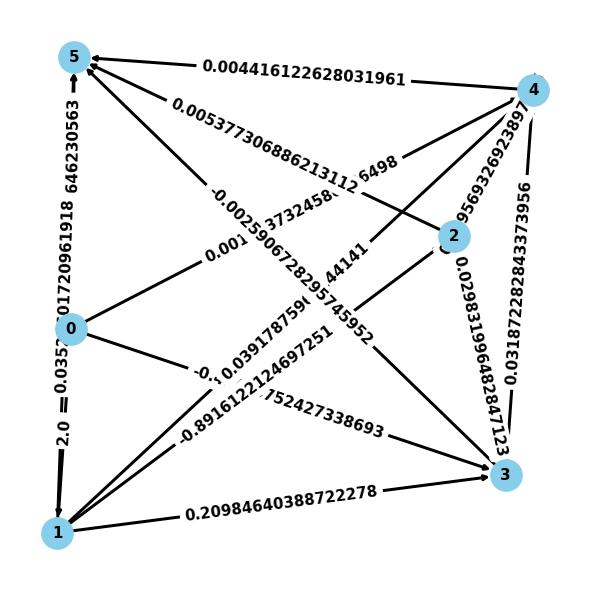

[[ 0.00000000e+00  2.00000000e+00  0.00000000e+00 -4.59457524e-01
   1.98373246e-03 -5.77616646e-02]
 [ 0.00000000e+00  0.00000000e+00 -8.91612212e-01  2.09846404e-01
   3.91787597e-02  3.52160172e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.98319965e-02
   4.95693269e-02  5.37730689e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.18722828e-02 -2.59067283e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.41612263e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [35]:
for i in range(1):
    start_dags[i]
    print(a)

In [2]:
# Gradient descent
from scipy.optimize import minimize
from tqdm.notebook import tqdm  

start_adj = np.array([[0,1,0,1,1],[0,0,1,1,1],[0,0,0,1,1],[0,0,0,0,1],[0,0,0,0,0]]).astype(float)

def f(x):
    ad = np.zeros_like(start_adj)
    ad[start_adj == 1] = x
    d = DAG(n = 5, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = ad)
    return d.get_continous_varsortability(analytical = False, simulated = True, N = 1000000)["simulated"]


_min = 1000
x0 = np.ones(np.sum(start_adj == 1))
# x0 = start_dags[0].adjacency_matrix[start_dags[0].adjacency_matrix != 0].astype(float).copy()
best = np.array([x0, x0, x0])
for i in tqdm(range(5)):
    res = minimize(f, x0, bounds = [(-2,2) for i in range(len(x0))], options={'disp': True, 'eps': 0.1, 'ftol': 1e-13, 'gtol': 1e-13, 'maxiter' : 10000, 'maxfun' : 1000})
    if (res.fun < _min):
        _min = res.fun
        print(res.fun)
        best[1:] = best[:-1]
        best[0] = res.x

  0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

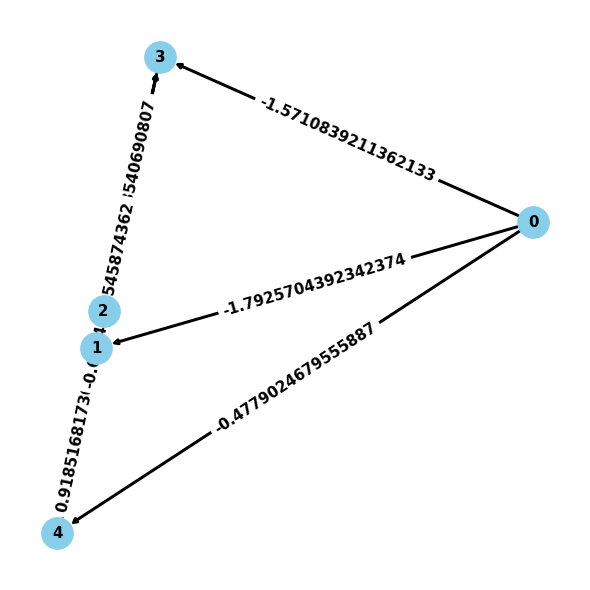

[[ 0.         -1.79257044  0.         -1.57108392 -0.47790247]
 [ 0.          0.         -1.61055881  0.63262079  1.4691218 ]
 [ 0.          0.          0.          0.68154354  0.91851682]
 [ 0.          0.          0.          0.         -0.62841065]
 [ 0.          0.          0.          0.          0.        ]]
{'analytical': 0.5454545454545454, 'simulated': 0.5454545454545454}
{'analytical': 3.4433323627139196, 'simulated': 3.444709527491217}


In [110]:
ad = np.zeros_like(start_adj)
ad[start_adj == 1] = np.array(best[0])

dag = DAG(n = 5, roots = 1, strength=2, precalculate_paths = False, adjacency_matrix = ad)
dag.plot()
print(ad)

print(dag.get_varsortability(analytical=True, simulated=True, N = 100000))

print(dag.get_continous_varsortability(analytical = True, simulated = True, N = 1000000))